# Figures for the hospitalization model

In [1]:
library(here)
source(here("setup.R"))


here() starts at /Users/stefan/workspace/work/phd/thesis



## Model 

Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = scales::label_comma()):
“log-10 transformation introduced infinite values.”


pdf 
  2

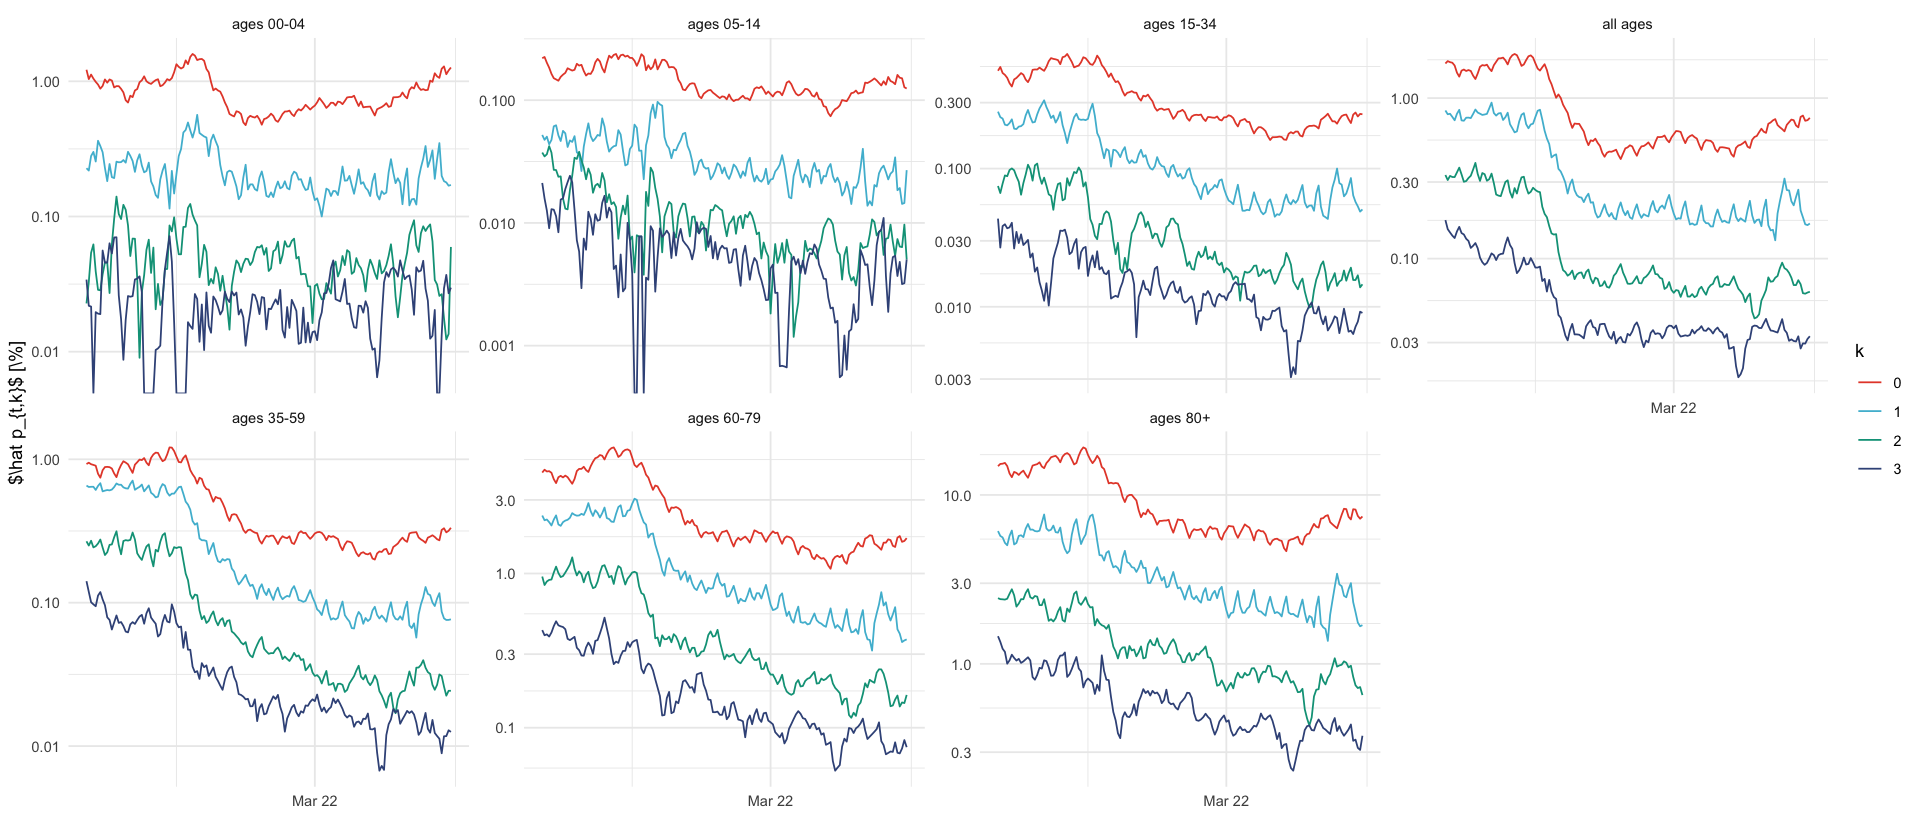

In [2]:
plt_probs <- read_csv(here("data/processed/seven_day_H_I_by_age.csv")) %>%
    mutate(p_sk = h / I * 100) %>%
    filter(k <= 3) %>%
    filter(s >= ymd('2021-11-22'), s <= ymd('2022-04-29')) %>%
    ggplot(aes(s, p_sk, color = factor(k))) +
    geom_line() +
    facet_wrap(~ fct_relevel(a, age_order_4cols), ncol = 4, labeller = age_group_labeller, scales = "free_y") +
    labs(x = "", y = "$\\hat p_{t,k}$ [\\%]") +
    scale_color_discrete(name = "k") +
    coord_cartesian(ylim = c(NA, NA)) +
    scale_y_log10(labels = scales::label_comma()) +
    scale_x_date(date_labels = "%b %y", date_breaks = "4 months")

plt_probs

ggsave_tikz(here("tikz/delay_hospitalization_probabilities.tex"))

## Application 1: Showcase

In [3]:
np <- import("numpy")
predictions <- np$load("/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_00-04.npy")
dim(predictions)
dates <- seq(from = ymd("2021-11-22"), to = ymd("2022-04-28"), by = "1 day")
length(dates)

n_delay <- 5
variables <- c(
    "prob_hosp",
    paste0("p_delay_smooth", seq(n_delay)),
    paste0("p_delay", seq(n_delay)),
    "weekday_0",
    "weekday_1",
    "avg_delay"
)
length(variables)

Warning message in poetry_config(required_module):
“This project appears to use Poetry for Python dependency management.
However, the 'poetry' command line tool is not available.
reticulate will be unable to activate this project.
Please ensure that 'poetry' is available on the PATH.”


[1]  25 158  14

[1] 158

[1] 14

In [4]:
df_files <- tibble(fname = list.files(here("data/results/4_hospitalizations/showcase"), full.names = T)) %>%
    filter(str_detect(fname, ".npy$")) %>%
    # mutate(age_group = paste0("A", str_extract(fname, "\\d\\d-\\d\\d"))) %>%
    mutate(age_group = c("A00-04", "A00+", "A05-14", "A15-34", "A35-59", "A60-79", "A80+")) %>%
    mutate(n_delay = c(5, 8, 5, 7, 7, 8, 8))

read_age_predictions <- function(fname, n_delay) {
    dates <- seq(from = ymd("2021-11-22"), to = ymd("2022-04-28"), by = "1 day")
    variables <- c(
        "prob_hosp",
        paste0("p_delay_smooth", seq(n_delay)),
        paste0("p_delay", seq(n_delay)),
        "weekday_0",
        "weekday_1",
        "avg_delay"
    )

    print(fname)
    read_predictions(fname, dates, variables)
}

df_predictions <- df_files %>%
    mutate(data = map2(fname, n_delay, read_age_predictions)) %>%
    select(-fname, -n_delay) %>%
    unnest() %>%
    mutate(age_group = ordered_age_group(age_group))


[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_00-04.npy"
[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_00+.npy"
[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_05-14.npy"
[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_15-34.npy"
[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_35-59.npy"
[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_60-79.npy"
[1] "/Users/stefan/workspace/work/phd/thesis/data/results/4_hospitalizations/showcase/predictions_age_80+.npy"


Warning message:
"`cols` is now required when using `unnest()`.
i Please use `cols = c(data)`."


In [5]:
df_predictions %>%
    distinct(variable) %>%
    pull()


[1] prob_hosp       p_delay_smooth1 p_delay_smooth2 p_delay_smooth3
 [5] p_delay_smooth4 p_delay_smooth5 p_delay1        p_delay2       
 [9] p_delay3        p_delay4        p_delay5        weekday_0      
[13] weekday_1       avg_delay       p_delay_smooth6 p_delay_smooth7
[17] p_delay_smooth8 p_delay6        p_delay7        p_delay8       
20 Levels: prob_hosp p_delay_smooth1 p_delay_smooth2 ... p_delay8

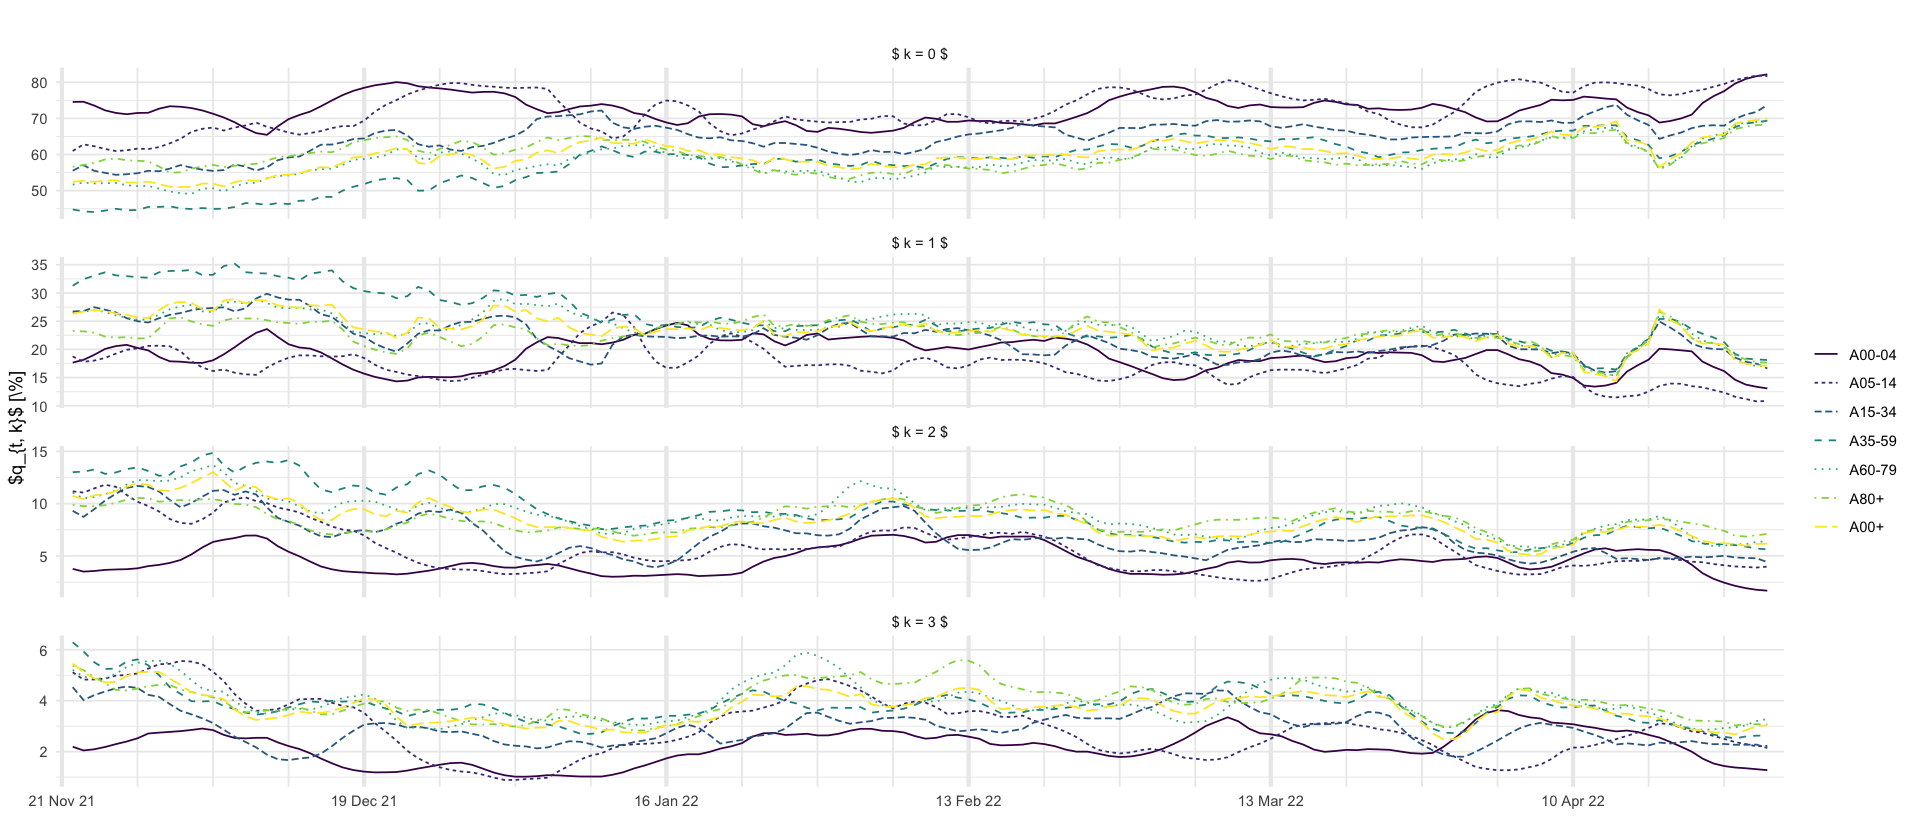

In [6]:
p_smoothed_delays <- df_predictions %>%
    select(age_group, date, variable, mean, `0.025`, `0.5`, `0.975`) %>%
    filter(str_detect(variable, "p_delay_smooth")) %>%
    mutate(variable = str_replace(variable, "p_delay_smooth", "")) %>%
    rename(k = variable) %>%
    mutate(k = as.numeric(k) - 1) %>%
    filter(k <= 3) %>%
    ggplot(aes(x = date, y = mean * 100, color = age_group, group = age_group, linetype = age_group)) +
    geom_line() +
    # geom_ribbon(aes(ymin = `0.025` * 100, ymax = `0.975` * 100, fill = age_group), alpha = 0.2) +
    labs(
        title = "",
        x = "",
        y = "$q_{t, k}$ [\\%]",
        color = "",
        linetype = ""
    ) +
    scale_x_four_weekly() +
    facet_wrap(~k, scales = "free_y", nrow = 4, labeller = labeller(k = function(x) str_glue("$ k = {x} $")))
p_smoothed_delays


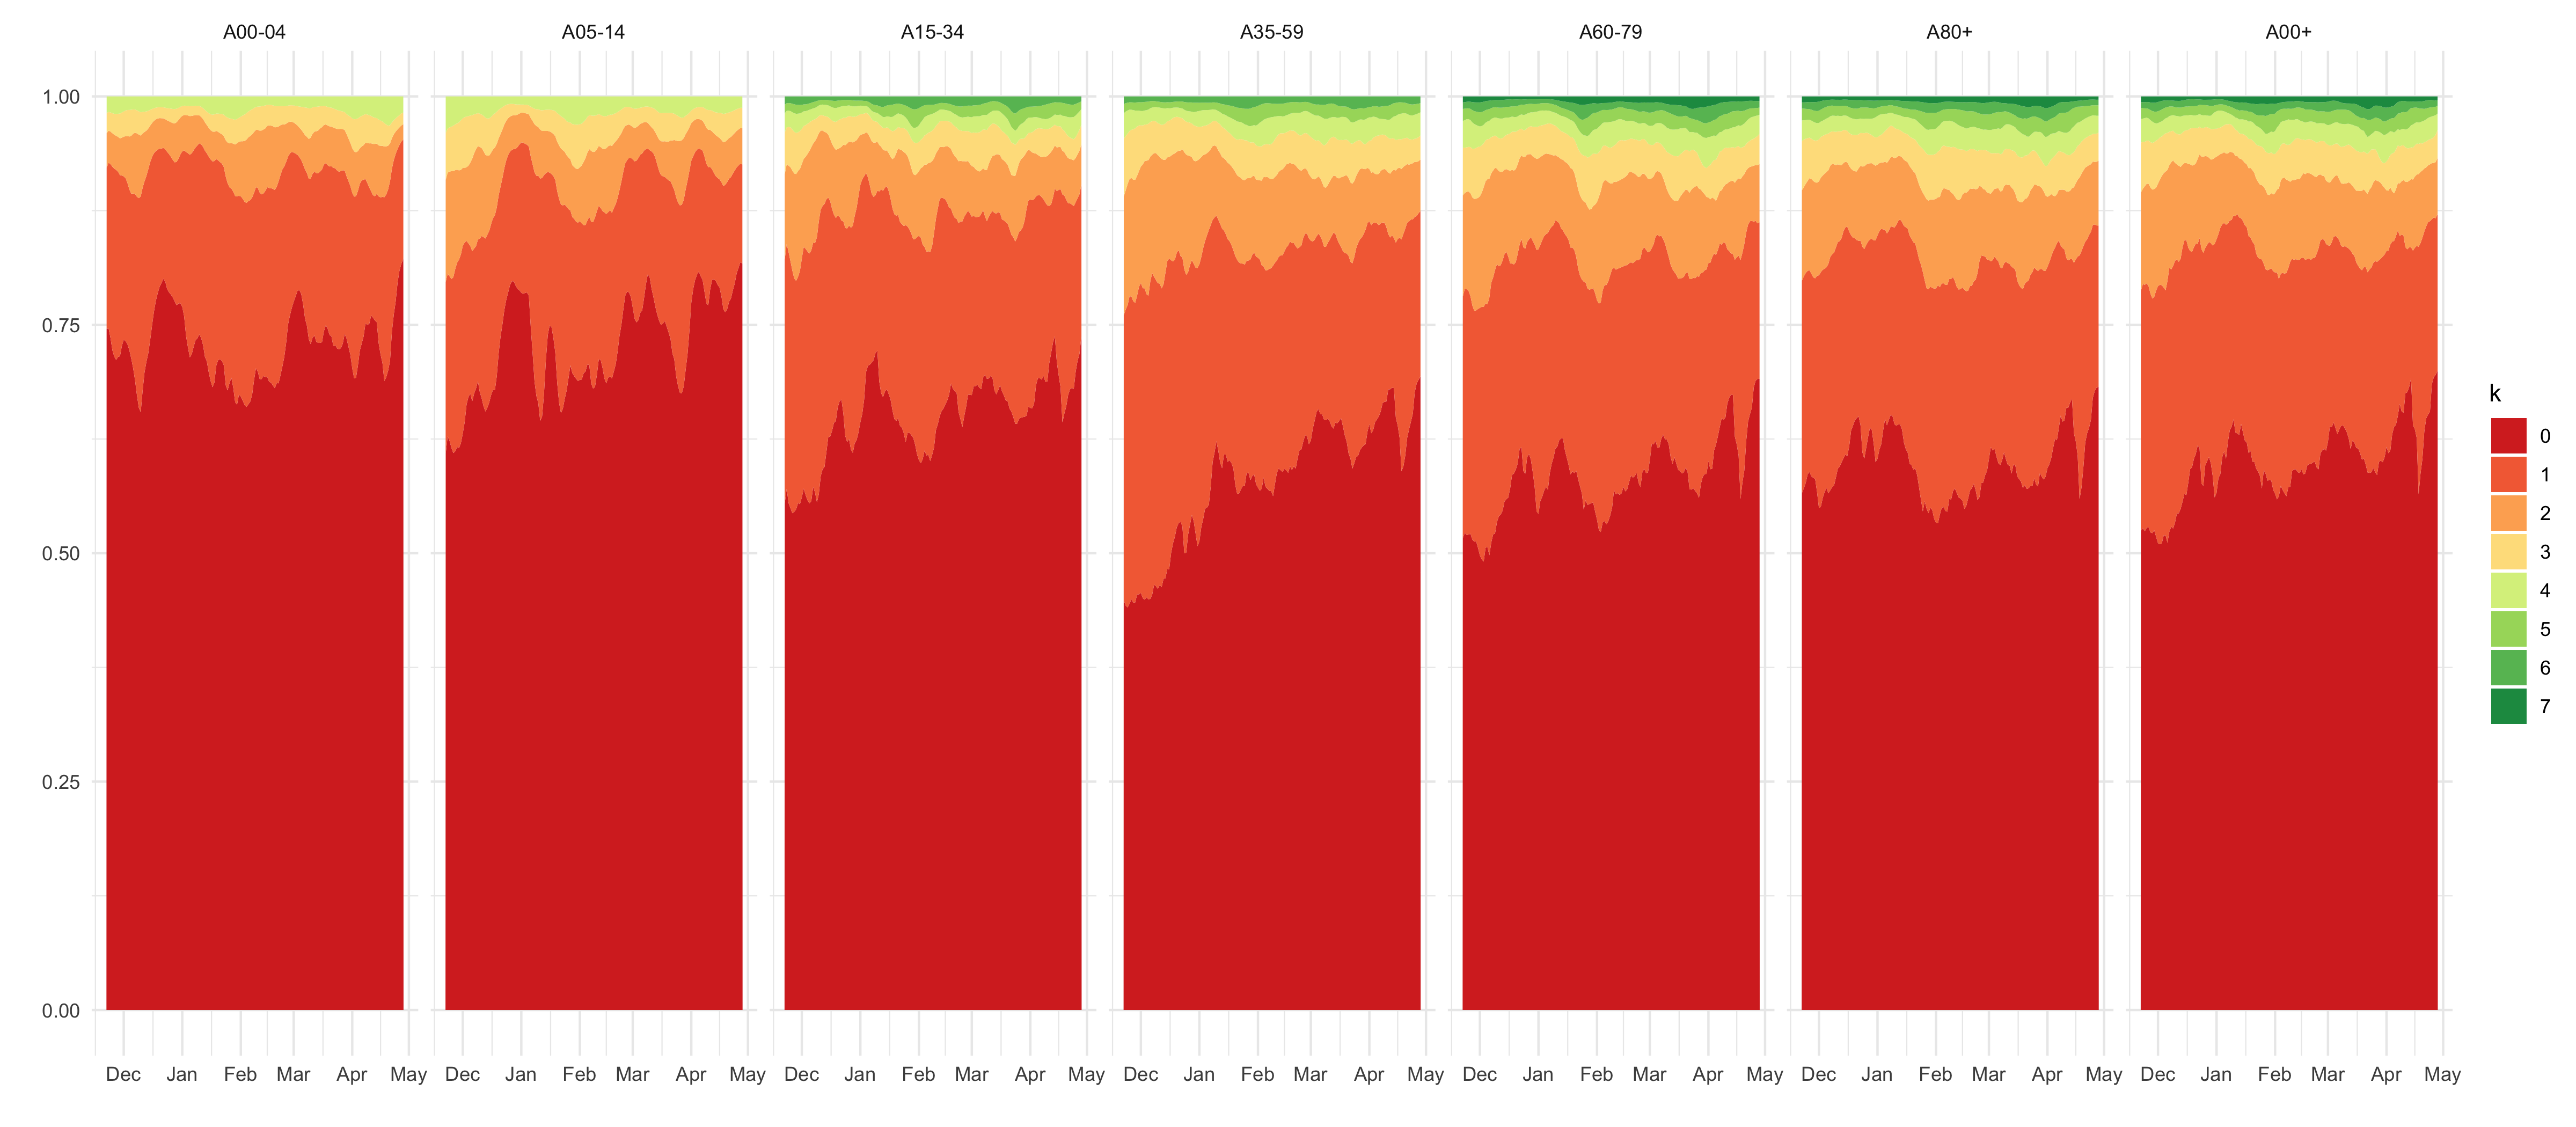

In [28]:
df_predictions %>%
    select(age_group, date, variable, mean, `0.025`, `0.5`, `0.975`) %>%
    filter(str_detect(variable, "p_delay_smooth")) %>%
    mutate(variable = str_replace(variable, "p_delay_smooth", "")) %>%
    rename(k = variable) %>%
    mutate(k = as.numeric(k) - 1) %>%
    filter(k <= 8) %>%
    mutate(k = factor(k)) %>%
    select(age_group, date, k, mean) %>%
    complete(age_group, date, k, fill = list(mean = 0)) %>%
    ggplot(aes(date, mean, fill = k)) +
    geom_area(position = position_stack(reverse = T)) +
    facet_wrap(~age_group, nrow = 1) +
    scale_fill_brewer(palette = "RdYlGn") +
    labs(x = "", y = "")


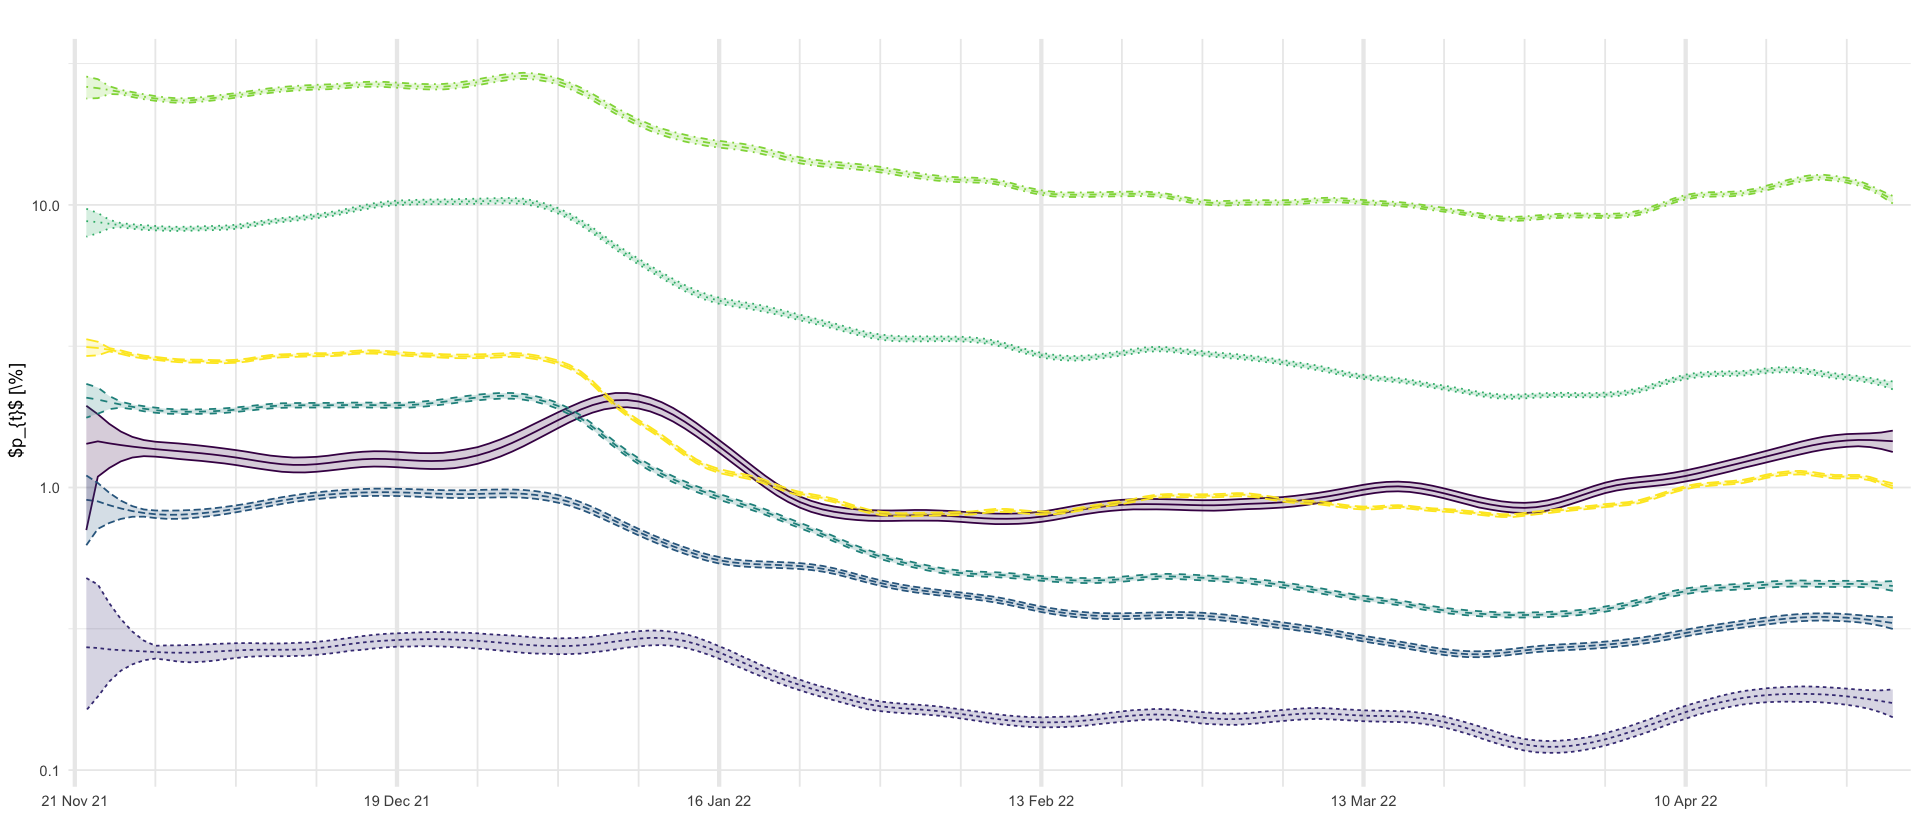

In [8]:
p_hospitalizations <- df_predictions %>%
    select(age_group, date, variable, mean, `0.025`, `0.5`, `0.975`) %>%
    filter(variable == "prob_hosp") %>%
    ggplot(aes(x = date, y = mean * 100, color = age_group, group = age_group, linetype = age_group)) +
    geom_line() +
    geom_ribbon(aes(ymin = `0.025` * 100, ymax = `0.975` * 100, fill = age_group), alpha = 0.2) +
    labs(
        title = "",
        x = "",
        y = " $p_{t}$ [\\%]"
    ) +
    scale_x_four_weekly() +
    scale_y_log10() +
    theme(legend.position = "none")
p_hospitalizations


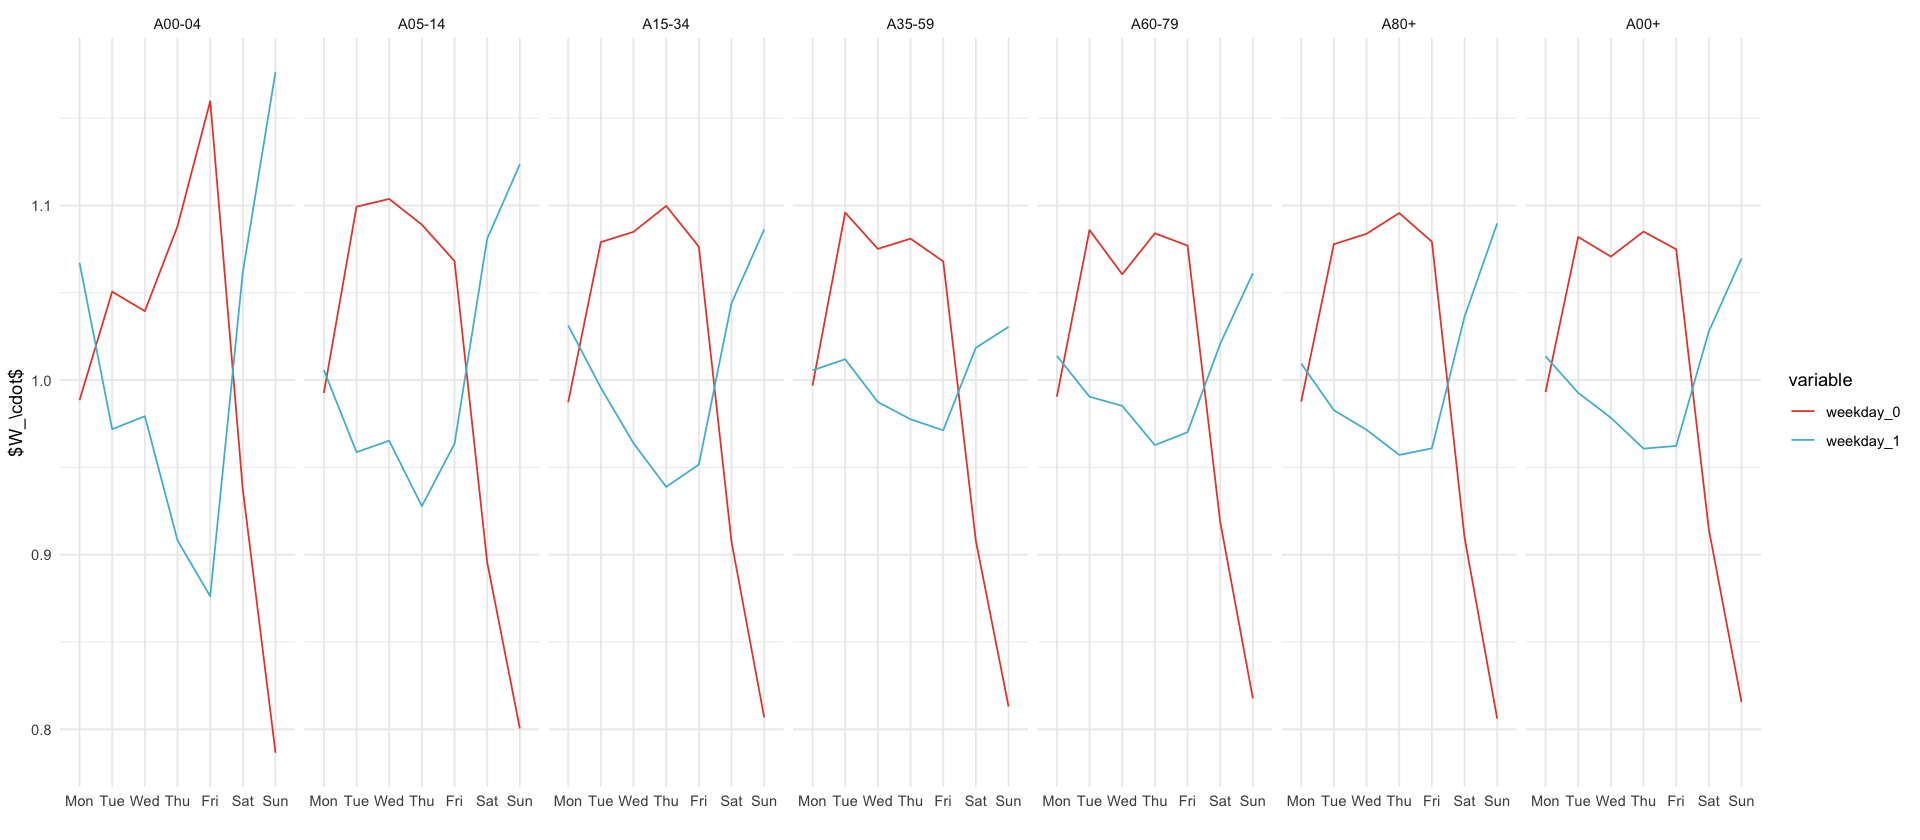

In [9]:
df_predictions %>%
    select(age_group, date, variable, mean, `0.025`, `0.5`, `0.975`) %>%
    filter(str_detect(variable, "weekday")) %>%
    ggplot(aes(x = wday(date, label = T, week_start = 1), mean, color = variable, group = variable)) +
    stat_summary(fun = mean, geom = "line") +
    facet_wrap(~age_group, nrow = 1) +
    xlab("") +
    ylab("$W_\\cdot$")


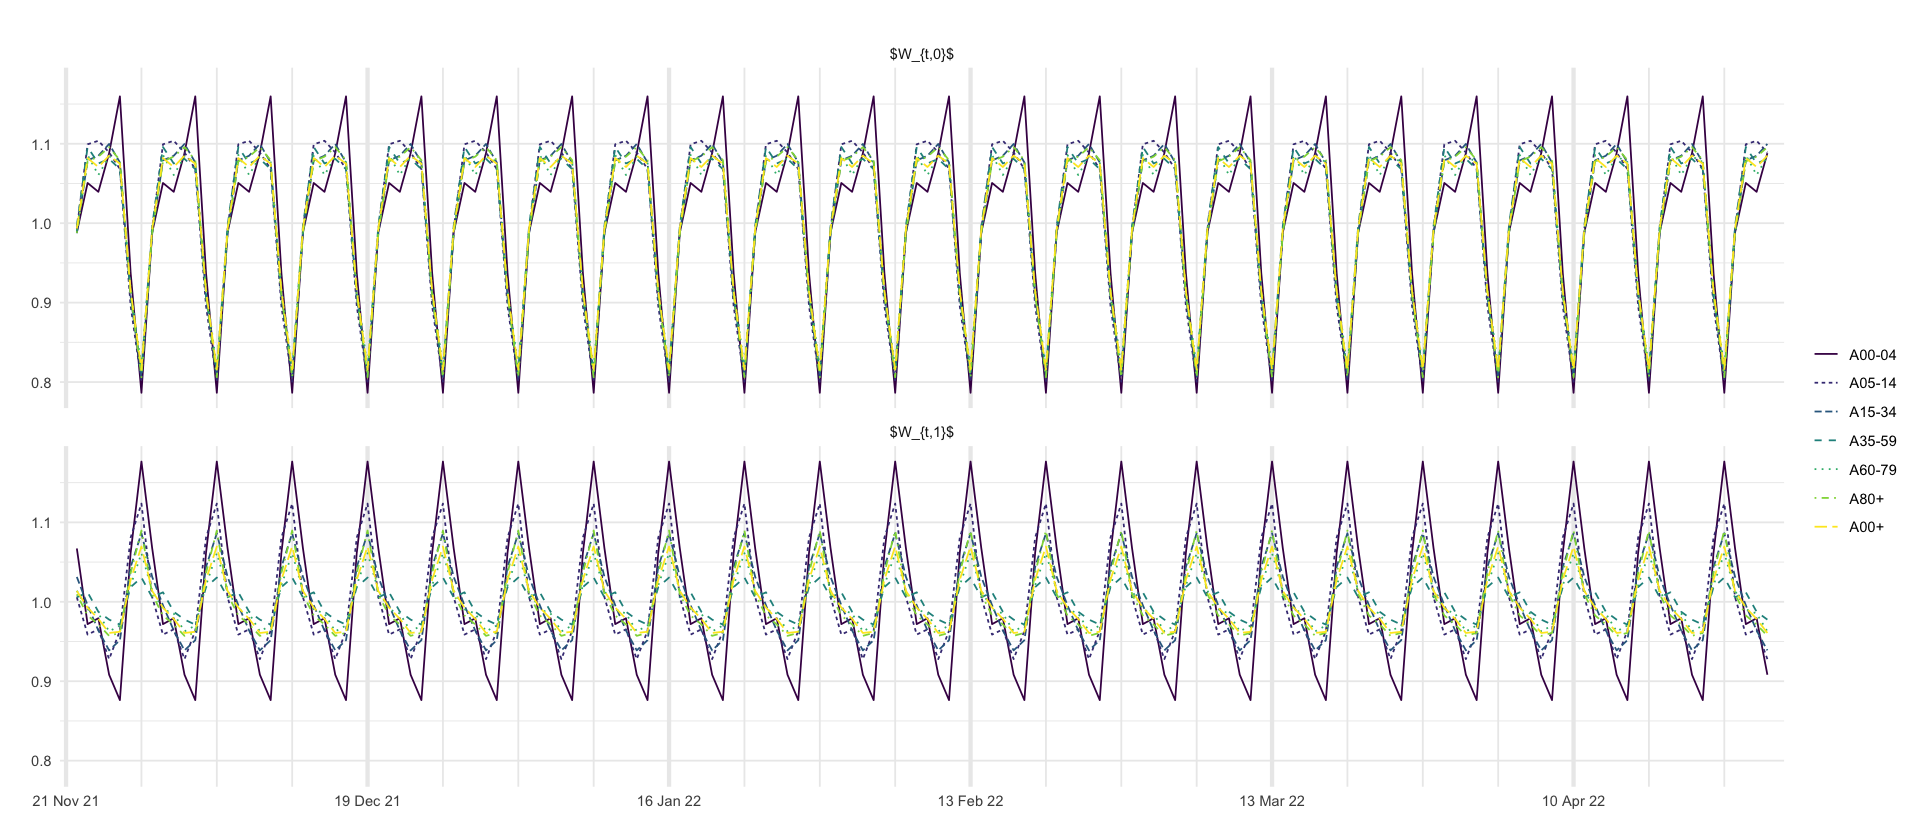

In [10]:
p_weekday <- df_predictions %>%
    select(age_group, date, variable, mean, `0.025`, `0.5`, `0.975`) %>%
    filter(str_detect(variable, "weekday")) %>%
    ggplot(aes(x = date, y = mean, color = age_group, group = age_group, linetype = age_group)) +
    geom_line() +
    # geom_ribbon(aes(ymin = `0.025` * 100, ymax = `0.975` * 100, fill = age_group), alpha = 0.2) +
    labs(
        title = "",
        x = "",
        y = "",
        linetype = "",
        color = ""
    ) +
    scale_x_four_weekly() +
    facet_wrap(~variable, nrow = 2, labeller = as_labeller(c("weekday_0" = "$W_{t,0}$", "weekday_1" = "$W_{t,1}$")))
p_weekday


In [11]:
p_avg_delays <- df_predictions %>%
    filter(variable == "avg_delay") %>%
    ggplot(aes(x = date, y = mean, color = age_group, group = age_group, linetype=age_group)) +
    geom_line() +
    scale_x_four_weekly() +
    labs(x = "", y = "$\\bar{\\tau}_{t}$ [weeks]", color = "", linetype="") 

pdf 
  2

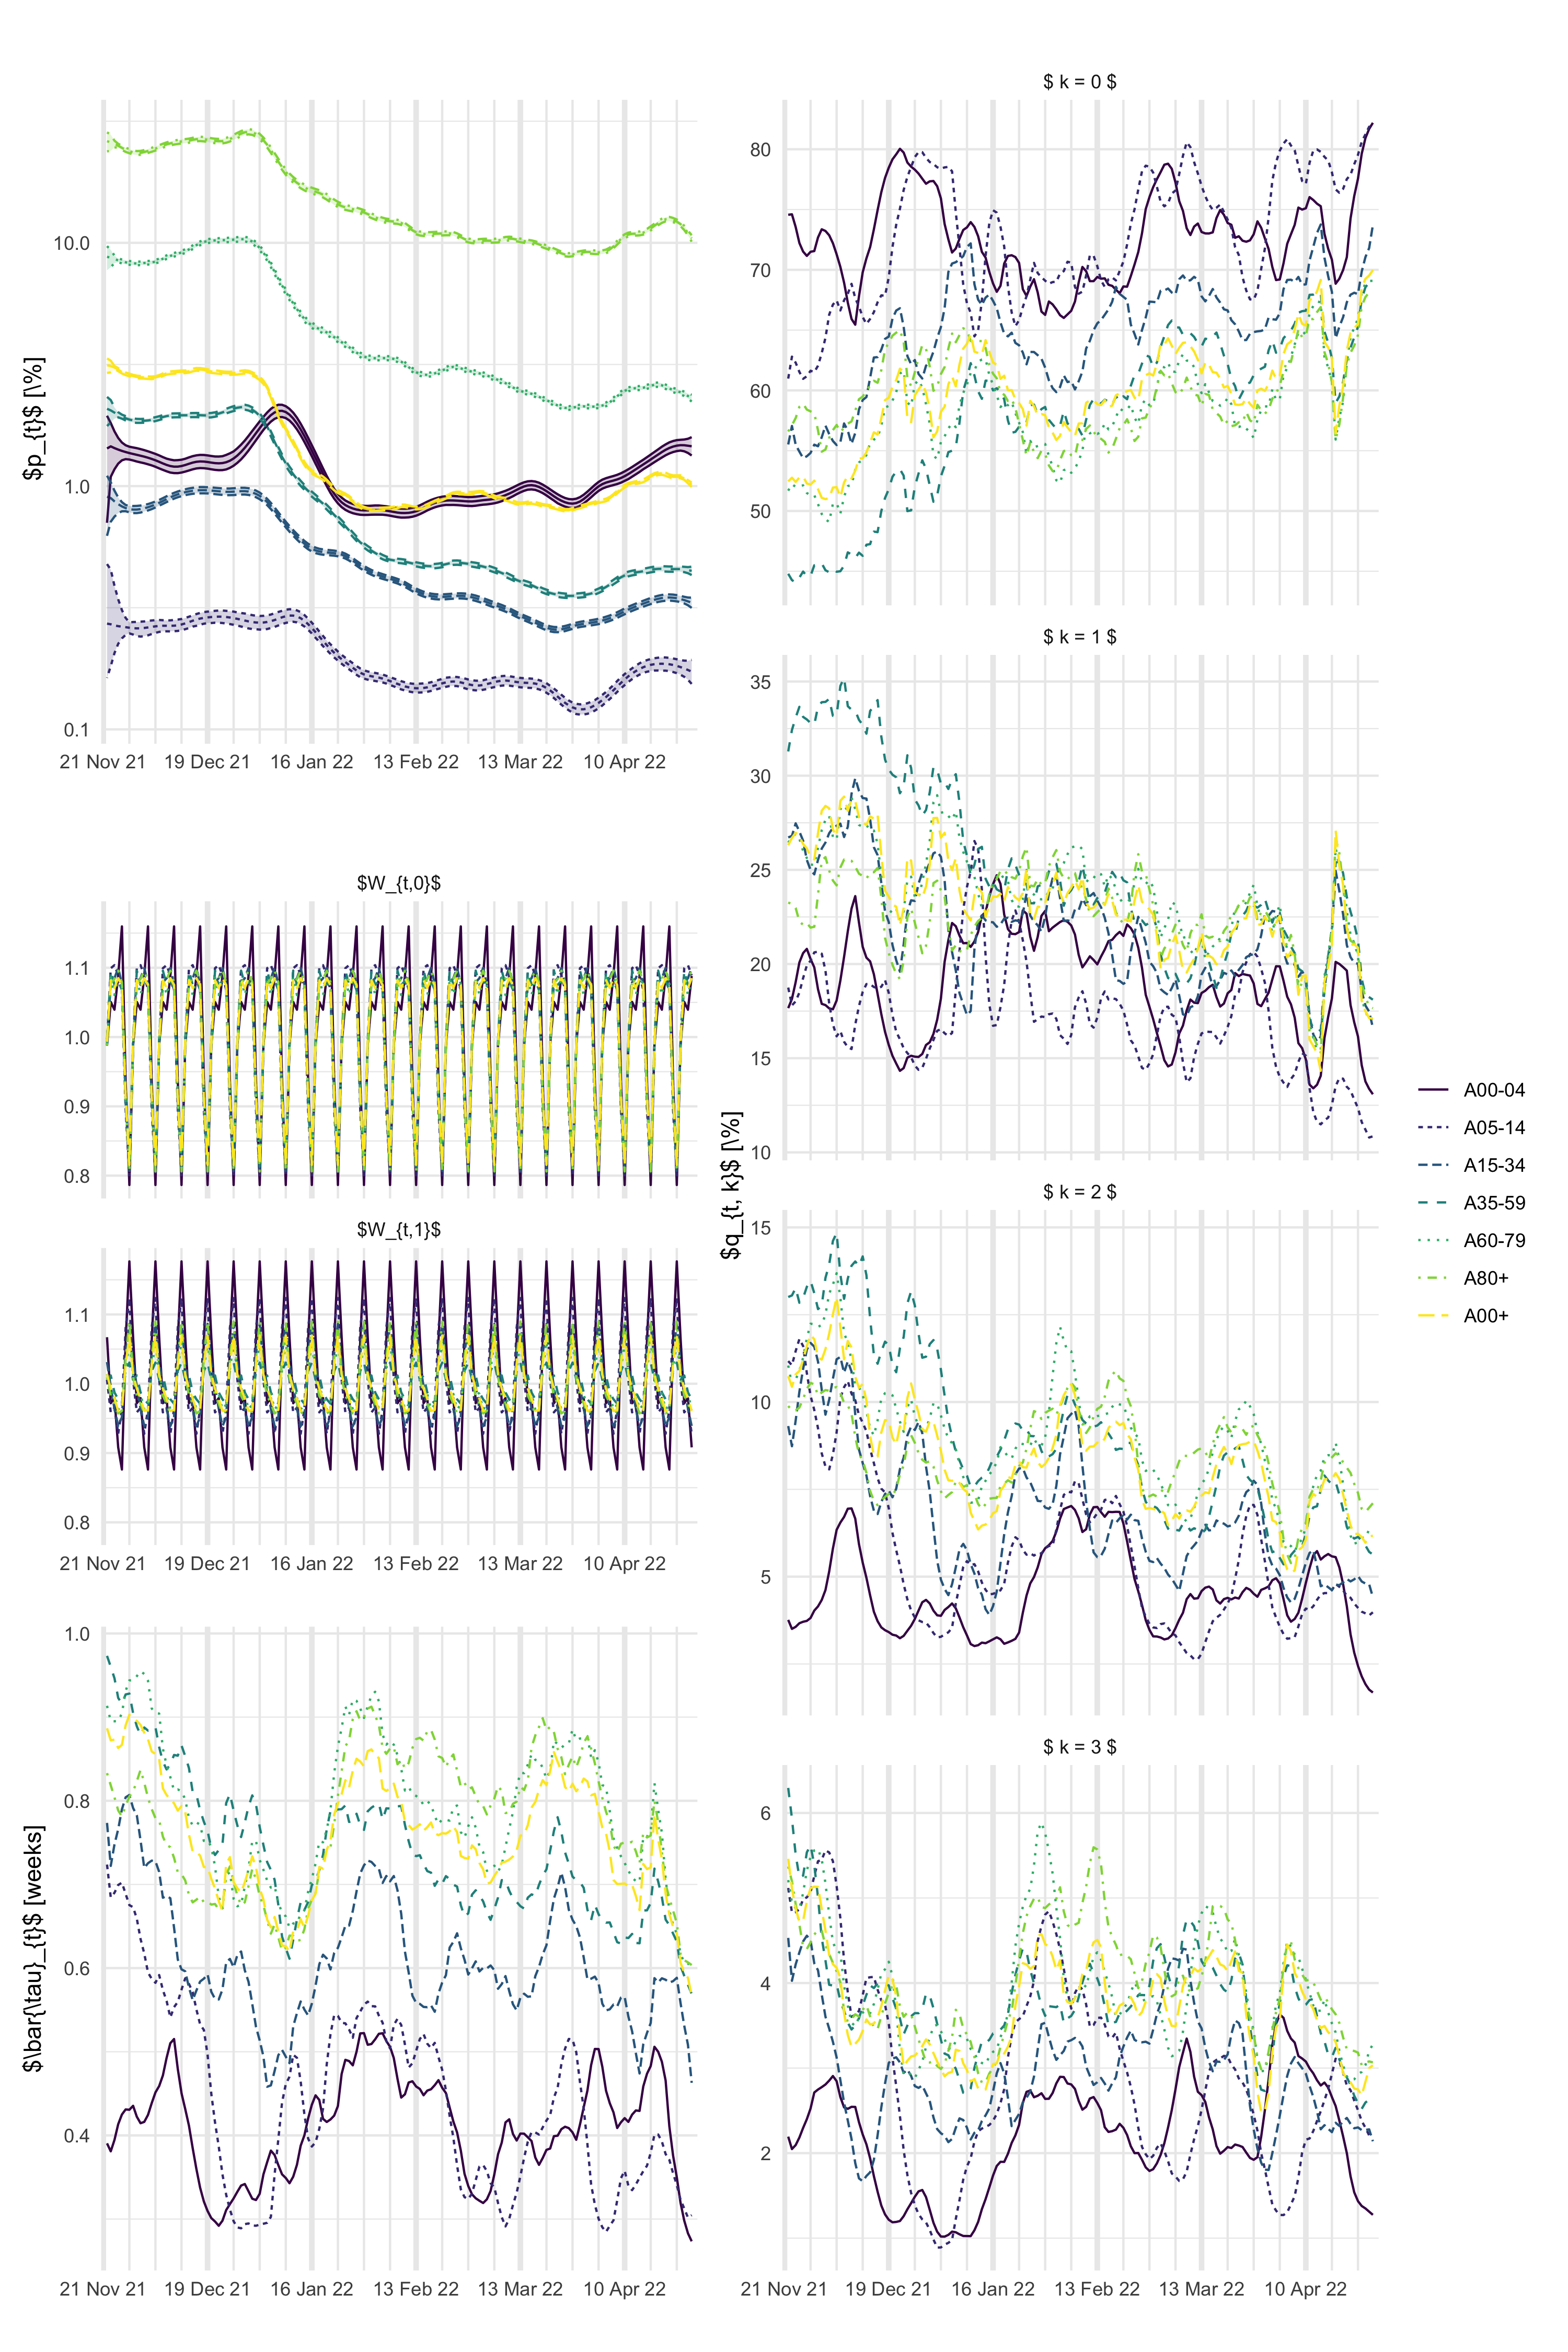

In [12]:
h <- 15
w <- 10
options(
    repr.plot.width = w,
    repr.plot.height = h,
    repr.plot.res = 300
)
((p_hospitalizations / p_weekday / p_avg_delays) | p_smoothed_delays) + plot_layout(guides = "collect")


ggsave_tikz(here("tikz/hospitalization_showcase_results.tex"), width = w, height = h)


## Application 2: Same-day nowcasts

In [13]:
library(here)
source(here("setup.R"))

In [14]:
df_nowcast <- read_csv(here("data/results/4_hospitalizations/nowcast/nowcast.csv")) 
start_date <- min(df_nowcast$date)
end_date <- ymd("2022-04-29")

df_nowcast <- df_nowcast %>%
    filter(date >= start_date & date <= end_date) 

In [15]:
add_all_age_groups_to_truth <- function(df) {
    all_ages <- df %>%
        group_by(case_date) %>%
        summarise(value = sum(value), .groups = "drop") %>%
        mutate(age_group = "00+") %>%
        select(age_group, case_date, value)

    rbind(df, all_ages) %>%
        arrange(case_date, age_group)
}


In [16]:
delay_6_weeks_truth <- read_csv(here("data/raw/all_hosp_age.csv")) %>%
    filter(hosp_date - case_date == 6 * 7) %>%
    filter(case_date >= start_date, case_date <= end_date) %>%
    select(age_group, case_date, value) %>%
    add_all_age_groups_to_truth() %>%
    filter(age_group == "00+")  %>%
    select(date = case_date, value)

In [17]:
df_ilm_prop42 <- read_csv(here("data/results/4_hospitalizations/nowcast/ilm_prop42.csv")) %>%
    mutate(date = ymd(date)) %>%
    filter(date >= start_date, date <= end_date)
    

df_nch_ensemble <- read_csv(here("data/results/4_hospitalizations/nowcast/nch_ensemble.csv")) %>%
    mutate(date = ymd(date)) %>%
    filter(date >= start_date, date <= end_date) 

In [18]:
all_df <- rbind(
    df_ilm_prop42 %>%
        mutate(model = "ILM-prop42"),
    df_nch_ensemble %>%
        mutate(model = "MeanEnsemble"),
    df_nowcast %>%
        mutate(model = "SSM")
)

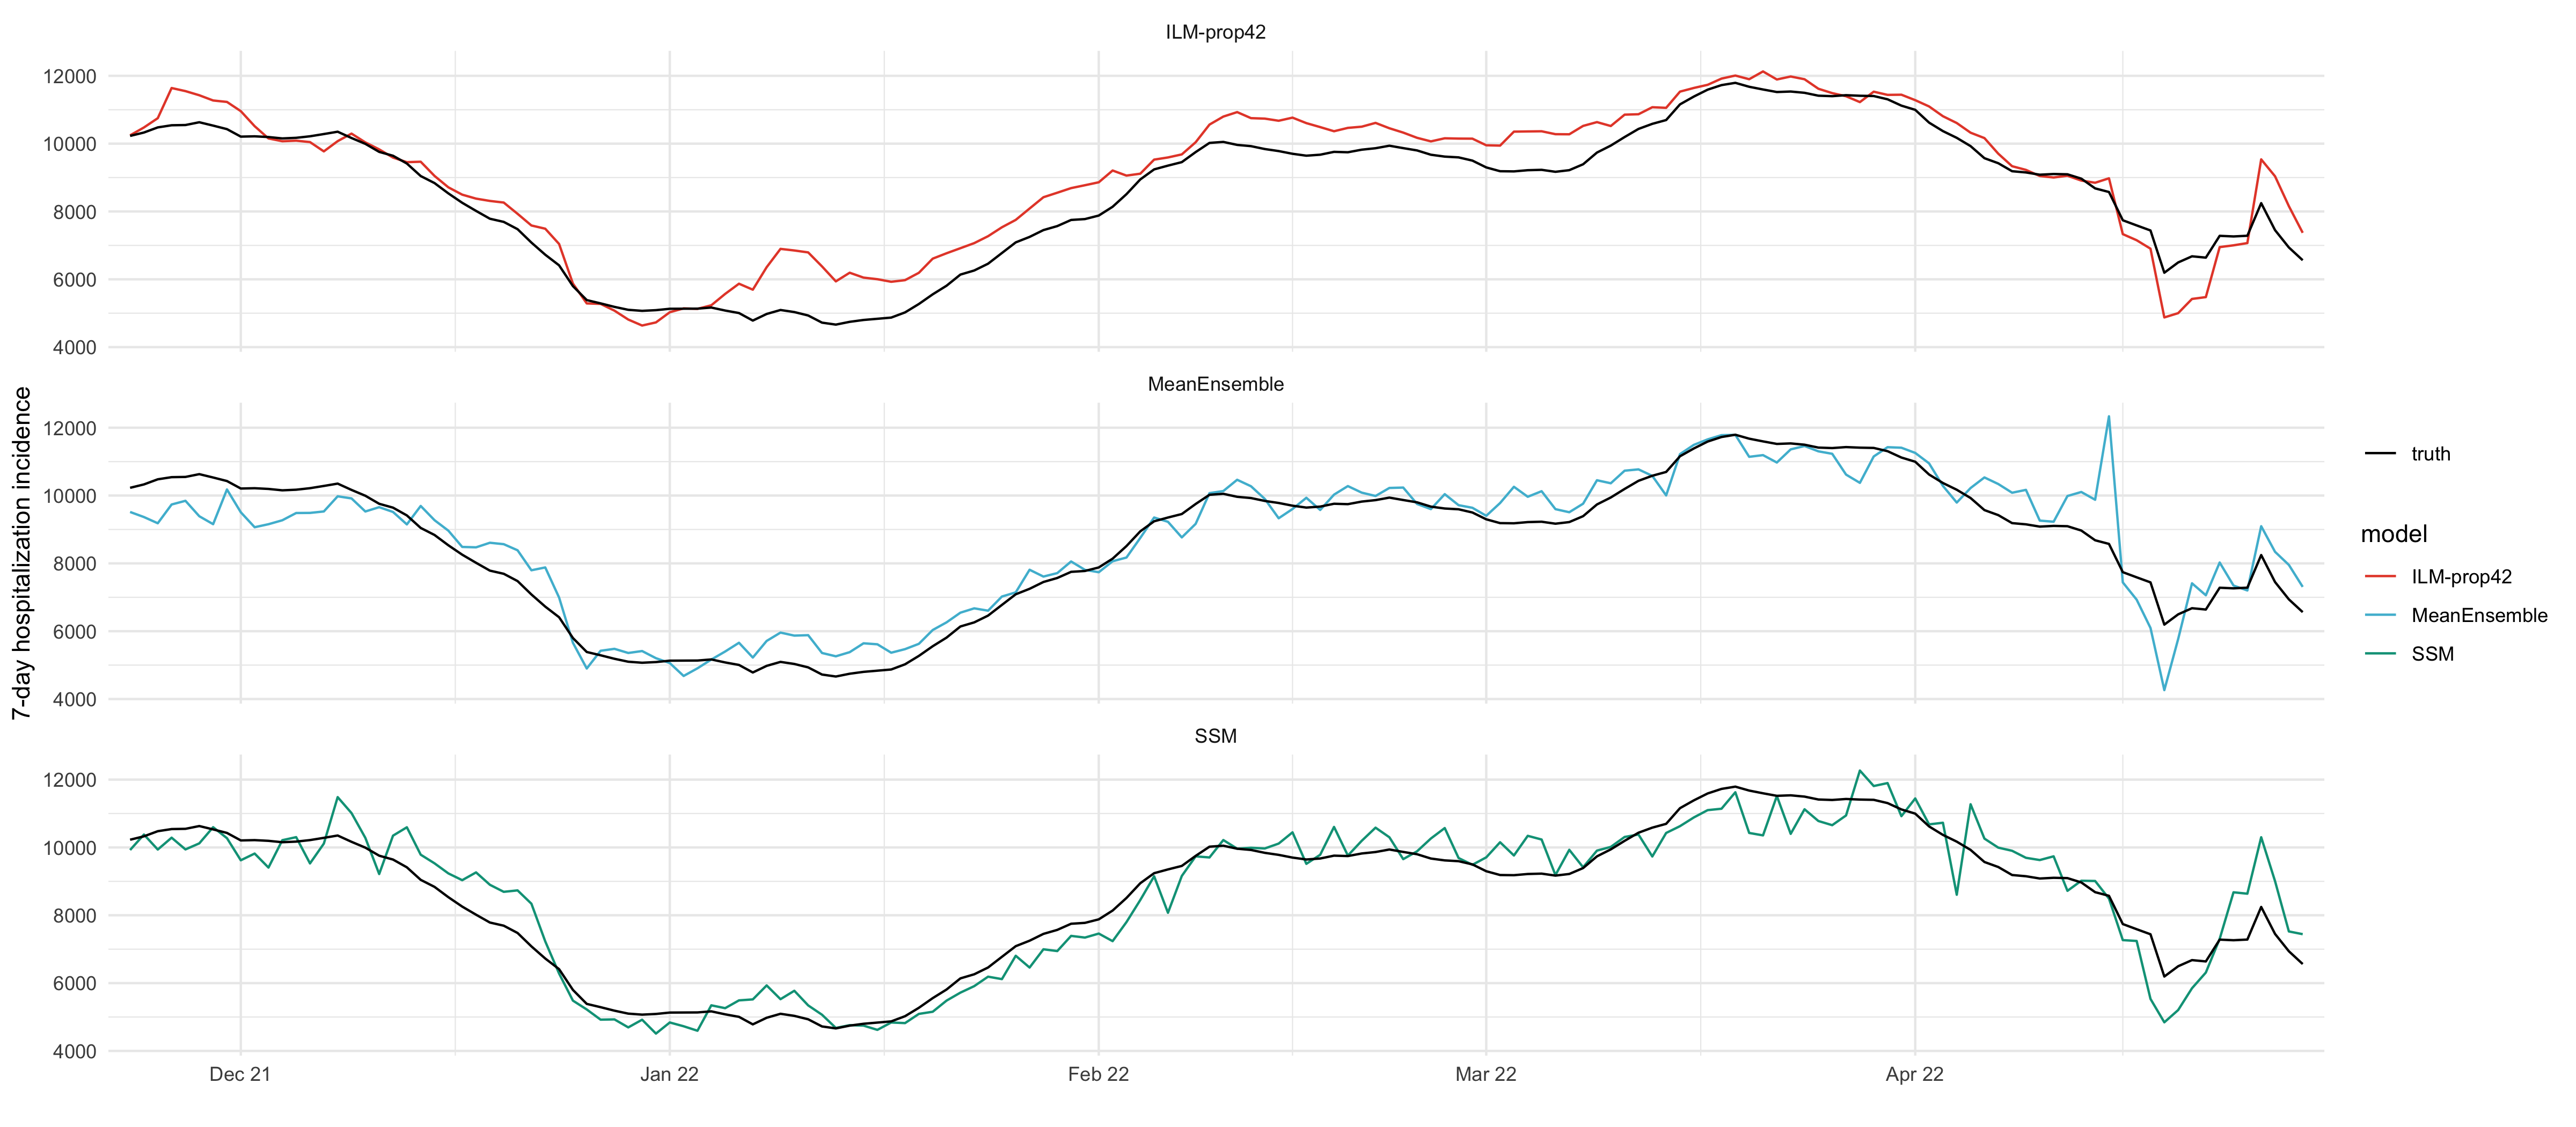

In [19]:
ggplot(all_df, aes(date)) +
    geom_line(aes(y=mean, color=model)) +
    geom_line(aes(x = date, y = value, linetype = "truth"), data = delay_6_weeks_truth) +
    labs(x = "", y = "7-day hospitalization incidence", linetype = NULL, fill = NULL) +
    scale_x_date(breaks = "1 months", date_labels = "%b %y", expand = expansion(mult = c(0.01, 0.01))) + 
    facet_wrap(~model, ncol = 1)

pdf 
  2

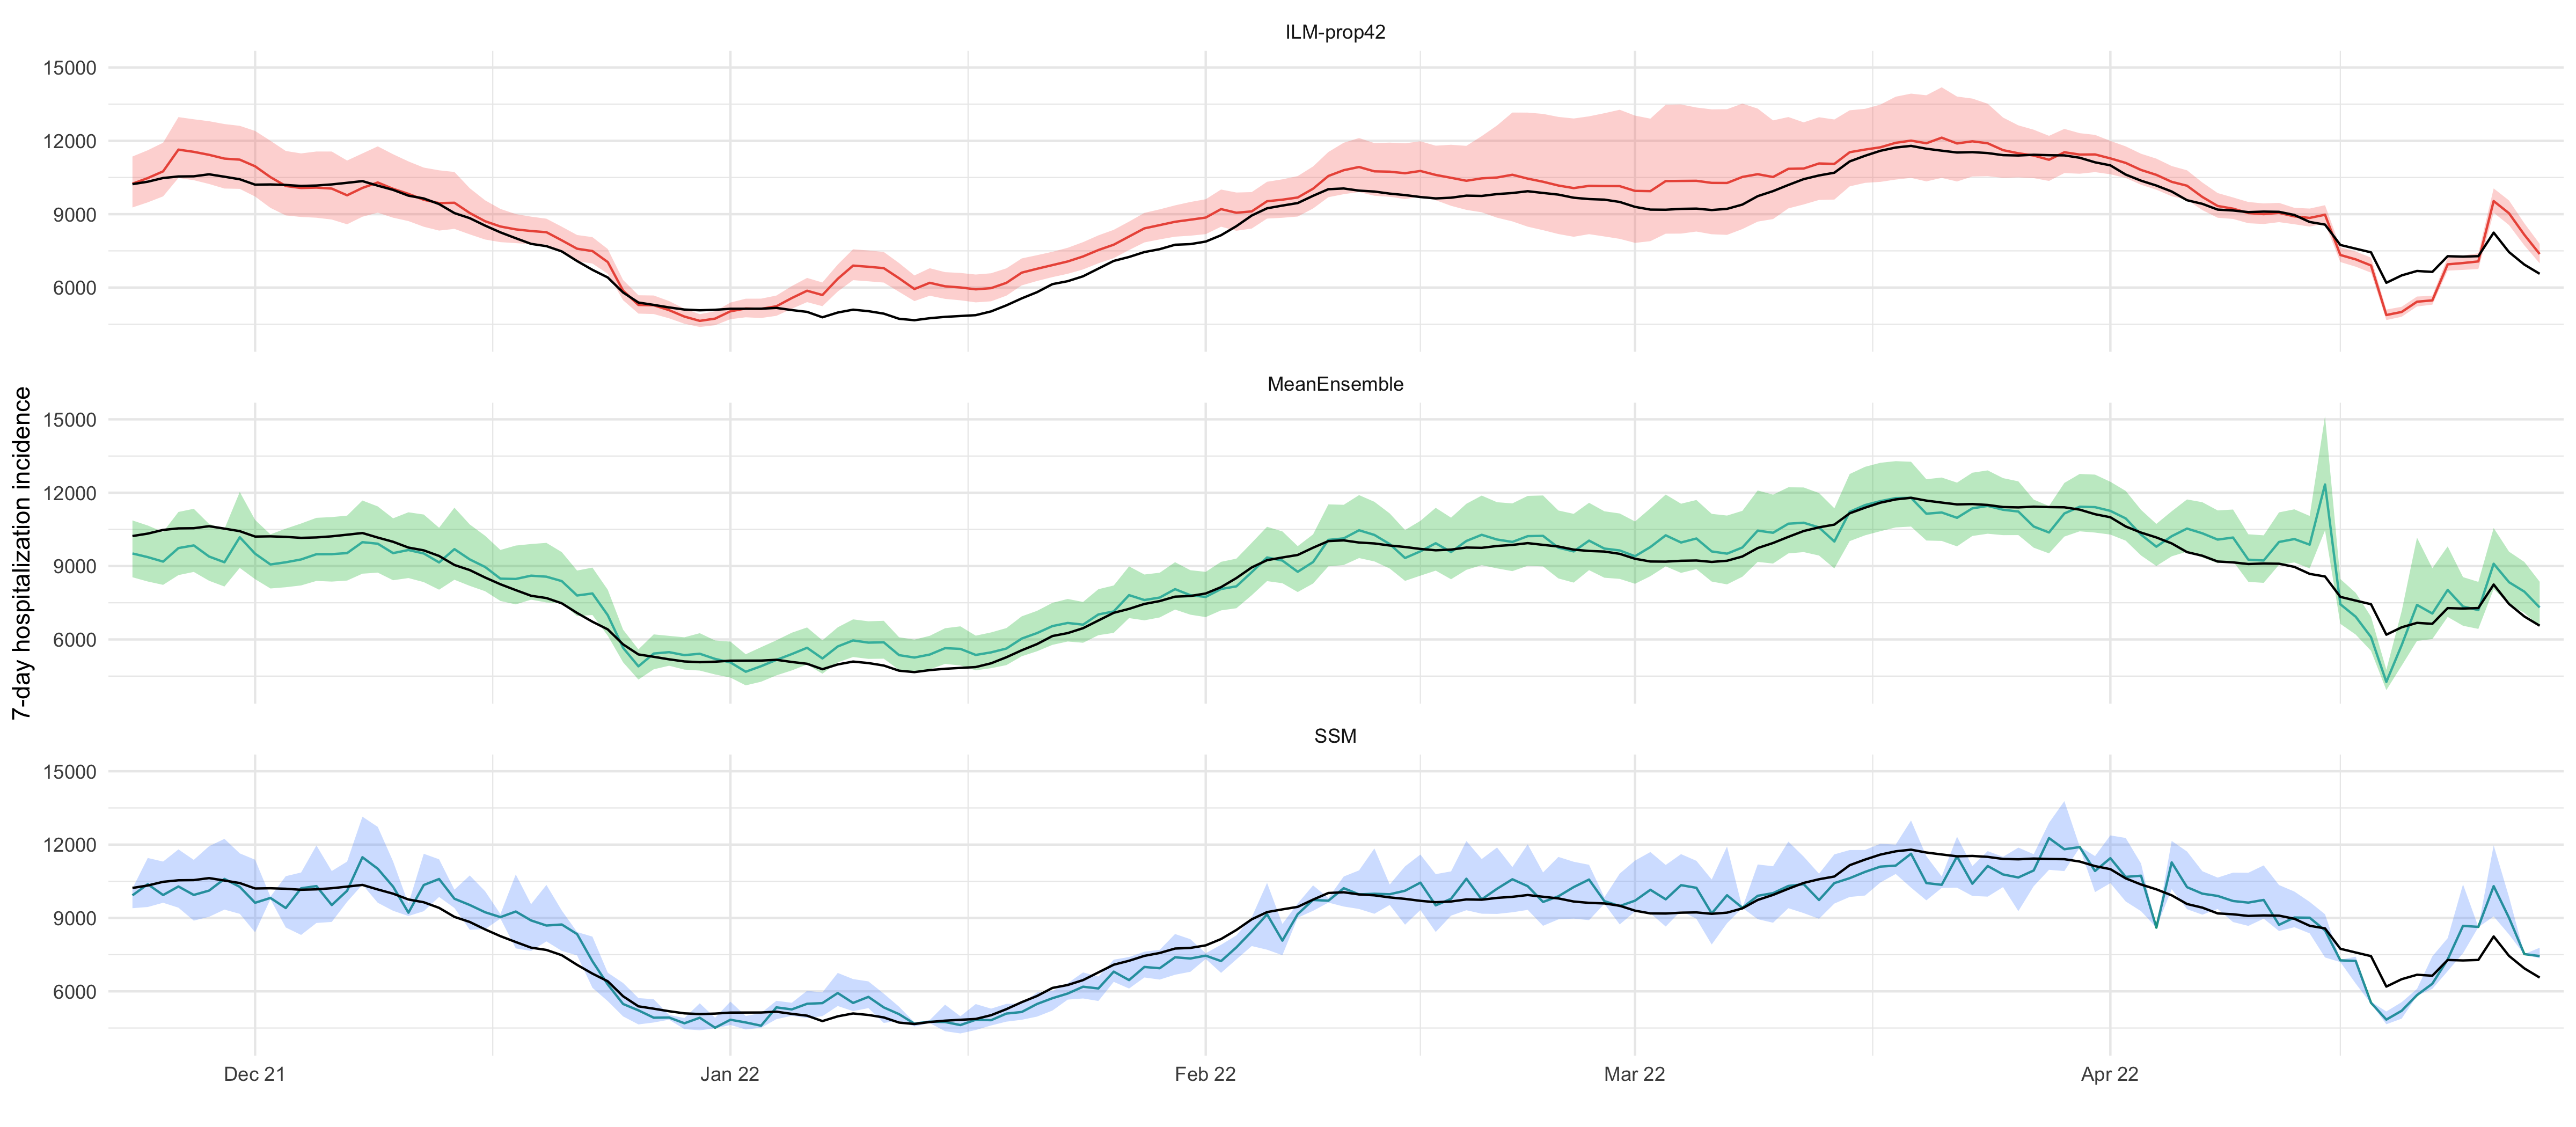

In [20]:

plt_nowcast = all_df %>%
    ggplot(aes(date)) +
    geom_line(aes(y=mean, color=model)) +
    geom_ribbon(aes(ymin = `2.5 %`, ymax = `97.5 %`, fill = model), alpha = 0.3) +
    geom_line(aes(x = date, y = value, linetype = "truth"), data = delay_6_weeks_truth) +
    labs(x = "", y = "7-day hospitalization incidence", linetype = NULL, fill = NULL) +
    scale_x_date(breaks = "1 months", date_labels = "%b %y", expand = expansion(mult = c(0.01, 0.01))) +
    facet_wrap(~model, ncol = 1) +
    # have legend only for the truth line
    guides(fill = "none", color = "none", linetype="none") +
    theme(legend.position = "bottom")

plt_nowcast
ggsave_tikz(here("tikz/hospitalization_nowcasts_all_models.tikz"))


In [21]:
quantiles <- c(0.025, 0.100, 0.250, 0.500, 0.750, 0.900, 0.975)
# interval score
IS <- function(prob, lower, upper, y) {
    (upper - lower) + (y < lower) * 2 / prob * (lower - y) + (y > upper) * 2 / prob * (y - upper)
}
# weighted interval score
WIS <- function(prob, quant, actual) {
    K <- length(prob)

    # count median twice
    prob <- c(prob[seq((K + 1) / 2)], prob[seq((K + 1) / 2, K)])

    wk <- prob / 2
    lower_quant <- quant[seq((K + 1) / 2)]
    upper_quant <- quant[seq(K, (K + 1) / 2, by = -1)]

    1 / (K + 1) * sum(wk * IS(prob, lower_quant, upper_quant, actual))
}

Use WIS from Wolffram et. al 2023

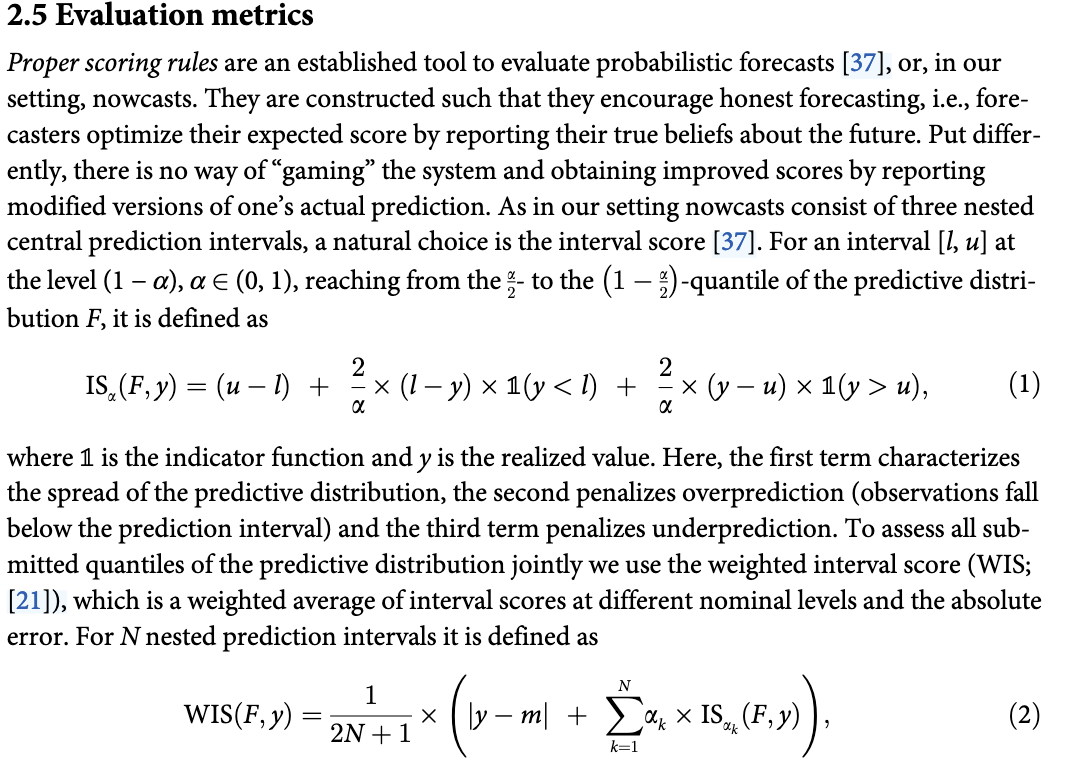

In [ ]:
WIS_decompose <- function(prob, quant, actual) {
  # Identify the median forecast
  median_idx <- which(prob == 0.5)
  median_forecast <- quant[median_idx]
  mean_error <- abs(actual - median_forecast)
  
  # Remove median for interval processing
  interval_idx <- setdiff(seq_along(prob), median_idx)
  prob_intervals <- prob[interval_idx]
  quant_intervals <- quant[interval_idx]
  
  K <- length(prob_intervals) / 2
  total_weight <- 0.5 + K  # 0.5 for median, alpha/2 per interval
  
  sharpness <- 0
  overprediction <- 0
  underprediction <- 0
  
  for (i in seq_len(K)) {
    lower_idx <- i
    upper_idx <- length(prob_intervals) - i + 1
    alpha <- 2 * prob_intervals[lower_idx]
    lower <- quant_intervals[lower_idx]
    upper <- quant_intervals[upper_idx]
    weight <- alpha / 2
    
    # Interval score components
    sharpness <- sharpness + weight * (upper - lower)

    underprediction <- underprediction + weight * ifelse(actual > upper, (2/alpha)*(actual - upper), 0)
    overprediction <- overprediction + weight * ifelse(actual < lower, (2/alpha)*(lower - actual), 0)
  }
  
  normalized_sharpness <- sharpness / total_weight
  normalized_underprediction <- underprediction / total_weight
  normalized_overprediction <- overprediction / total_weight
  normalized_mean_error <- (0.5 * mean_error) / total_weight
  
  wis <- normalized_sharpness + normalized_overprediction + normalized_underprediction + normalized_mean_error
  return(list(
    wis = wis,
    sharpness = normalized_sharpness,
    underprediction = normalized_underprediction,
    overprediction = normalized_overprediction,
    mean_error = normalized_mean_error
  ))
}

In [23]:
delay_6_weeks_truth %>% 
    inner_join(all_df, by="date") %>%
    rename(truth=value) %>%
    rowwise() %>%
    mutate(
        WIS_decompose = list(WIS_decompose(
            prob=quantiles,
            quant=c(`2.5 %`, `10.0 %`, `25.0 %`, `50.0 %`, `75.0 %`, `90.0 %`, `97.5 %`),
            actual= truth
           ))
    ) %>%
    unnest_wider(WIS_decompose) 

date       truth mean      sd        2.5 %     10.0 % 25.0 %    50.0 %
1   2021-11-23 10228 10245.000        NA  9274.000  9582   9874.000 10220 
2   2021-11-23 10228  9516.000        NA  8543.000  8766   9100.000  9459 
3   2021-11-23 10228  9924.819 217.76895  9400.000  9646   9783.000  9962 
4   2021-11-24 10328 10477.000        NA  9484.000  9799  10099.000 10452 
5   2021-11-24 10328  9366.000        NA  8369.000  8734   8961.000  9316 
6   2021-11-24 10328 10380.229 452.01200  9449.000 10002  10236.000 10357 
7   2021-11-25 10479 10751.000        NA  9728.000 10053  10361.000 10725 
8   2021-11-25 10479  9183.000        NA  8232.000  8592   8781.000  9138 
9   2021-11-25 10479  9938.246 565.99399  9622.000  9622   9622.000  9741 
10  2021-11-26 10542 11640.000        NA 10481.000 10849  11198.000 11611 
11  2021-11-26 10542  9736.000        NA  8631.000  8920   9260.000  9674 
12  2021-11-26 10542 10287.936 663.93321  9421.000  9611   9664.186 10134 
13  2021-11-27 10549 11549.000        NA 10390.000 10757  11106.000 11519 
14  2021-11-27 10549  9845.000        NA  8761.000  9002   9363.000  9779 
15  2021-11-27 10549  9941.979 789.97866  8891.373  8953   9307.000  9836 
16  2021-11-28 10631 11427.000        NA 10235.000 10612  10971.000 11395 
17  2021-11-28 10631  9390.000        NA  8399.000  8553   8957.000  9333 
18  2021-11-28 10631 10120.425 801.76490  9049.000  9169   9524.000 10043 
19  2021-11-29 10532 11273.000        NA 10049.000 10435  10803.000 11239 
20  2021-11-29 10532  9156.000        NA  8164.000  8347   8723.000  9094 
21  2021-11-29 10532 10596.912 947.50385  9342.000  9522   9882.000 10308 
22  2021-11-30 10428 11230.000        NA 10035.000 10412  10771.000 11197 
23  2021-11-30 10428 10179.000        NA  8925.000  9228   9604.000 10071 
24  2021-11-30 10428 10272.902 671.13866  9169.000  9682   9830.000 10109 
25  2021-12-01 10207 10958.000        NA  9721.000 10108  10479.000 10921 
26  2021-12-01 10207  9507.000        NA  8465.000  8804   9041.000  9444 
27  2021-12-01 10207  9621.779 691.52404  8415.000  8565   9323.000  9619 
28  2021-12-02 10216 10515.000        NA  9258.000  9648  10024.000 10474 
29  2021-12-02 10216  9066.000        NA  8084.000  8458   8641.000  9016 
30  2021-12-02 10216  9819.809  51.88439  9769.000  9769   9769.000  9769 
⋮   ⋮          ⋮     ⋮         ⋮         ⋮         ⋮      ⋮         ⋮     
445 2022-04-20 6497   5002.000        NA 4805.000  4870   4930       4999 
446 2022-04-20 6497   5769.000        NA 4926.000  5125   5354       5673 
447 2022-04-20 6497   5205.512 236.72890 4884.000  4982   4990       5088 
448 2022-04-21 6678   5421.000        NA 5226.000  5291   5350       5419 
449 2022-04-21 6678   7412.000        NA 5941.000  6262   6640       7196 
450 2022-04-21 6678   5848.341 102.31164 5823.000  5823   5823       5823 
451 2022-04-22 6639   5475.000        NA 5300.000  5358   5411       5473 
452 2022-04-22 6639   7060.000        NA 6016.000  6246   6533       6932 
453 2022-04-22 6639   6311.532 304.94940 6101.000  6101   6195       6204 
454 2022-04-23 7282   6949.000        NA 6691.000  6776   6855       6945 
455 2022-04-23 7282   8025.000        NA 6921.000  7191   7489       7919 
456 2022-04-23 7282   7304.925 316.34075 6826.145  6974   7050       7222 
457 2022-04-24 7264   7002.000        NA 6722.000  6814   6900       6998 
458 2022-04-24 7264   7346.000        NA 6560.000  6750   6973       7285 
459 2022-04-24 7264   8677.240 597.39840 7555.000  8232   8439       8470 
460 2022-04-25 7284   7068.000        NA 6759.000  6861   6955       7063 
461 2022-04-25 7284   7201.000        NA 6431.000  6627   6851       7141 
462 2022-04-25 7284   8636.296  65.90022 8625.000  8625   8635       8635 
463 2022-04-26 8245   9536.000        NA 9059.000  9216   9361       9529 
464 2022-04-26 8245   9095.000        NA 8059.000  8346   8642       9018 
465 2022-04-26 8245  10300.299 722.85582 9064.000  9800   9854      10133 
466 2022-04-27 7450   9038.00

In [24]:
df <- delay_6_weeks_truth %>% 
    inner_join(all_df, by="date") %>%
    rename(truth=value) %>%
    rowwise() %>%
    mutate(
        WIS_decompose = list(WIS_decompose(
            prob=quantiles,
            quant=c(`2.5 %`, `10.0 %`, `25.0 %`, `50.0 %`, `75.0 %`, `90.0 %`, `97.5 %`),
            actual= truth
           ))
    ) %>%
    unnest_wider(WIS_decompose) %>%
    group_by(model) %>%
    summarize(
        mae = mean(abs(mean - truth), na.rm = TRUE),
        coverage_95 = mean(`2.5 %` <= truth & truth <= `97.5 %`, na.rm = TRUE),
        coverage_50 = mean(`25.0 %` <= truth & truth <= `75.0 %`, na.rm = TRUE),
        WIS = mean(wis),
        sharpness = mean(sharpness),
        underprediction = mean(underprediction),
        overprediction = mean(overprediction),
        mean_error = mean(mean_error),
        length_95 = mean(`97.5 %` - `2.5 %`, na.rm = TRUE),
        length_50 = mean(`75.0 %` - `25.0 %`, na.rm = TRUE),
    ) 

df_table_performance <- df %>%
  select(-model) %>%  # Remove model column temporarily
  mutate(coverage_50 = coverage_50 * 100) %>%
  mutate(coverage_95 = coverage_95 * 100) %>%
  rename(
    `Mean Absolute Error` = mae,
    `Coverage 50% PI [%]` = coverage_50,
    `Coverage 95% PI [%]` = coverage_95,
    `WIS` = WIS,
    `Sharpness` = sharpness,
    `Underprediction` = underprediction,
    `Overprediction` = overprediction,
  ) %>%
  select(-length_95, -length_50, -mean_error) %>%
  t() %>%  # Transpose
  as.data.frame() %>%  # Convert to data frame
  rownames_to_column(var = "name") %>%  # Move row names to a column
  setNames(c("metric", "ILM-prop42", "MeanEnsemble", "SSM"))

In [25]:
df_table_performance

metric              ILM-prop42 MeanEnsemble SSM      
1 Mean Absolute Error 589.32278  502.91139    526.39546
2 Coverage 95% PI [%]  68.98734   86.70886     67.72152
3 Coverage 50% PI [%]  42.40506   46.20253     29.11392
4 WIS                 377.58133  282.67052    352.07059
5 Sharpness           101.37156  110.21302     75.30180
6 Underprediction      33.91139   40.52803    100.46889
7 Overprediction      162.52984   61.63472     97.02961

In [26]:
txt_performance <- df_table_performance %>% 
    mutate(across(where(is.numeric), ~ round(.x, 1))) %>%
    setNames(c("", "ILM-prop42", "MeanEnsemble", "SSM")) %>%
    kbl(format='latex', booktabs = T) %>%
    pack_rows("WIS components", 5, 7) %>%
    column_spec(2, bold =c(F,F,F,F,F,T,F)) %>%
    column_spec(3, bold =c(T,T,T,T,F,F,T)) %>%
    column_spec(4, bold =c(F,F,F,F,T,F,F)) 
    
# write txt_performance to file
txt_performance %>%
    write_lines(here("tables/df_table_performance.tex"))

In [27]:
txt_performance


\begin{tabular}[t]{l>{}r>{}r>{}r}
\toprule
 & ILM-prop42 & MeanEnsemble & SSM\\
\midrule
Mean Absolute Error & 589.3 & \textbf{502.9} & 526.4\\
Coverage 95\% PI [\%] & 69.0 & \textbf{86.7} & 67.7\\
Coverage 50\% PI [\%] & 42.4 & \textbf{46.2} & 29.1\\
WIS & 377.6 & \textbf{282.7} & 352.1\\
\addlinespace[0.3em]
\multicolumn{4}{l}{\textbf{WIS components}}\\
\hspace{1em}Sharpness & 101.4 & 110.2 & \textbf{75.3}\\
\hspace{1em}Underprediction & \textbf{33.9} & 40.5 & 100.5\\
\hspace{1em}Overprediction & 162.5 & \textbf{61.6} & 97.0\\
\bottomrule
\end{tabular}